<a href="https://colab.research.google.com/github/CarranzaDritte/INTELIGENCIA_ARTIFICIAL_RN_1889205_IMTC_FIME/blob/master/PIA-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Install Kaggle
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carranza117","key":"9d96401d747f71f719dcc299ef2590a8"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-07-07 19:18:09           9163  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5617  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2035  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2399  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [10]:
! kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

In [36]:
seg_train = '/content/seg_train/seg_train'
seg_test = '/content/seg_test/seg_test'
seg_pred = '/content/seg_pred/seg_pred'

In [37]:
generate = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [38]:
training_set = generate.flow_from_directory(seg_train,
                                            target_size = (100, 100),
                                            batch_size = 14034,
                                            classes = ["buildings","forest","glacier","mountain","sea","street"],
                                            class_mode = 'categorical')
test_set = generate.flow_from_directory(seg_test,
                                        target_size = (100, 100),
                                        batch_size = 3000,
                                        classes = ["buildings","forest","glacier","mountain","sea","street"],
                                        class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [40]:
X_train,y_train = training_set.next()
X_test,y_test = test_set.next()

In [42]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=None))
model.add(Conv2D(64,(3,3), activation='relu' , padding= "same"))
model.add(MaxPool2D(pool_size=(2,2),strides=None))
model.add(Conv2D(64,(3,3), activation='relu' , padding= "same"))
model.add(MaxPool2D(pool_size=(2,2),strides=None))
model.add(Conv2D(128,(3,3), activation='relu' , padding= "same"))
model.add(MaxPool2D(pool_size=(2,2),strides=None))
model.add(Conv2D(128,(3,3), activation='relu' , padding= "same"))
model.add(MaxPool2D(pool_size=(2,2),strides=None))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(6,activation ='softmax'))

In [43]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 128)      

In [45]:
Model = model.fit(X_train, y_train, epochs = 15, verbose=1, batch_size=500, validation_split = 0.1)

Epoch 1/15
26/26 [==============================] - 168s 6s/step - loss: 1.6624 - accuracy: 0.2921 - val_loss: 1.2005 - val_accuracy: 0.5377
Epoch 2/15
26/26 [==============================] - 165s 6s/step - loss: 1.1961 - accuracy: 0.5217 - val_loss: 1.0252 - val_accuracy: 0.5769
Epoch 3/15
26/26 [==============================] - 169s 6s/step - loss: 1.0160 - accuracy: 0.5989 - val_loss: 0.8740 - val_accuracy: 0.6531
Epoch 4/15
26/26 [==============================] - 167s 6s/step - loss: 0.9186 - accuracy: 0.6418 - val_loss: 0.8321 - val_accuracy: 0.6795
Epoch 5/15
26/26 [==============================] - 167s 6s/step - loss: 0.9006 - accuracy: 0.6493 - val_loss: 0.7543 - val_accuracy: 0.7151
Epoch 6/15
26/26 [==============================] - 168s 6s/step - loss: 0.8027 - accuracy: 0.6995 - val_loss: 0.7018 - val_accuracy: 0.7372
Epoch 7/15
26/26 [==============================] - 169s 7s/step - loss: 0.7297 - accuracy: 0.7334 - val_loss: 0.8322 - val_accuracy: 0.6738
Epoch 8/15
26

In [61]:
score = model.evaluate(X_test, y_test, verbose=1)

94/94 [==============================] - 12s 127ms/step - loss: 0.5642 - accuracy: 0.7970


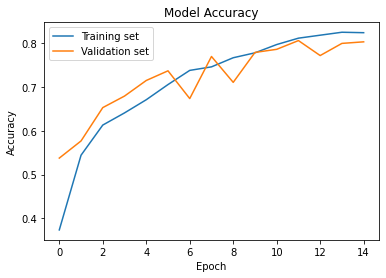

In [53]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

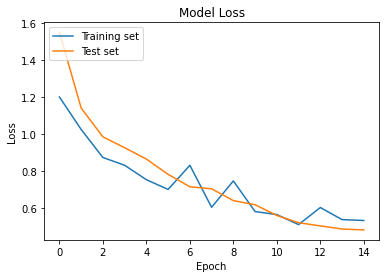

In [54]:

plt.plot(Model.history['val_loss'])
plt.plot(Model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [55]:
model.save("model.h5")

In [57]:
from keras.models import load_model

In [58]:
model = load_model('model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 128)      

In [62]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5642217397689819
Test accuracy: 0.796999990940094


In [64]:
predictions = model.predict(X_test)

In [67]:
predictions[0]


array([1.2511462e-03, 6.3721949e-01, 2.2000029e-05, 6.9876216e-07,
       1.1953033e-05, 3.6149466e-01], dtype=float32)

In [68]:
predictions[1]

array([0.00134652, 0.00103761, 0.13604468, 0.5237536 , 0.3364564 ,
       0.00136116], dtype=float32)

In [69]:
predictions[2]

array([2.0756738e-04, 1.8031730e-03, 3.0687220e-02, 7.8657430e-01,
       1.8054079e-01, 1.8696582e-04], dtype=float32)

In [71]:
predictions[3]

array([0.28278357, 0.00091949, 0.01143672, 0.07629044, 0.4439471 ,
       0.18462266], dtype=float32)

In [70]:
np.argmax(predictions[0])

1